## Importação da base de dados

In [ ]:
# quando dar o display a tabela aparece com as informações separadas por ; por isso uisa o sep = para delimitar 
# info() serve para mostrar como estao classificadas cada coluna da tabela para tranformar as ques nao estão como numericas em numero 
import pandas as pd


base_insurance = pd.read_csv("base_health_insurance.csv", sep=";")
display(base_insurance)
display(base_insurance.info())

,age,gender,bmi,children,discount_eligibility,region,expenses,premium
0,19,female,"24,1",0,yes,south,"1483,21","1744,95"
1,18,male,"23,5",1,no,southeast,"2237,61","2632,48"
2,28,male,33,3,no,southeast,"2046,09","2728,12"
3,33,male,"23,3",0,no,midwest,"2331,69","2743,17"
4,32,male,"23,4",0,no,midwest,"1942,5","2285,3"
...,...,...,...,...,...,...,...,...
1333,50,male,31,3,no,midwest,"1343,86","1791,81"
1334,18,female,"23,5",0,no,northeast,"1392,07","1637,73"
1335,18,female,"25,3",0,no,southeast,"2118,99","2492,92"
1336,21,female,"23,9",0,no,south,"1431,34","1683,93"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   age                   1338 non-null   int64 
 1   gender                1338 non-null   object
 2   bmi                   1338 non-null   object
 3   children              1338 non-null   int64 
 4   discount_eligibility  1338 non-null   object
 5   region                1338 non-null   object
 6   expenses              1338 non-null   object
 7   premium               1338 non-null   object
dtypes: int64(2), object(6)
memory usage: 83.8+ KB


None

## Ajustes de tipos de dados

In [27]:
# fazer um tratamento de texto para transformar a coluna bmi em uma nova coluna trocando o , pelo . 
# transformar a coluna em uma nova coluna numérica to_numeric e o errors="coerce" para forçar a execução caso encontre um erro 
# transformar a coluna de desconto em binário para poder entrar na analise de colunas numéricas 
# colocando entre colchetes mesmo que a coluna nao exista na tabela o python automaticamente adiciona a coluna com o nome inserido ai criou a coluna tratada de desconto
# O numpy permite 👉 transformar condicional de dados em larga escala por isso nao usa o IF que funciona para uma única decisão por vez.
# str serve para aplicar uma formula de texto 
import numpy as np

base_insurance["bmi"] = base_insurance["bmi"].replace(",", ".")
base_insurance["bmi"] = pd.to_numeric(base_insurance["bmi"], errors="coerce")
base_insurance["Discount_tratado"] = np.where(base_insurance["discount_eligibility"] =="yes",1,0 )
display(base_insurance)
display(base_insurance.info())


,age,gender,bmi,children,discount_eligibility,region,expenses,premium,Discount_tratado
0,19,female,24.1,0,yes,south,"1483,21","1744,95",1
1,18,male,23.5,1,no,southeast,"2237,61","2632,48",0
2,28,male,33.0,3,no,southeast,"2046,09","2728,12",0
3,33,male,23.3,0,no,midwest,"2331,69","2743,17",0
4,32,male,23.4,0,no,midwest,"1942,5","2285,3",0
...,...,...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,midwest,"1343,86","1791,81",0
1334,18,female,23.5,0,no,northeast,"1392,07","1637,73",0
1335,18,female,25.3,0,no,southeast,"2118,99","2492,92",0
1336,21,female,23.9,0,no,south,"1431,34","1683,93",0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   1338 non-null   int64  
 1   gender                1338 non-null   object 
 2   bmi                   1338 non-null   float64
 3   children              1338 non-null   int64  
 4   discount_eligibility  1338 non-null   object 
 5   region                1338 non-null   object 
 6   expenses              1338 non-null   object 
 7   premium               1338 non-null   object 
 8   Discount_tratado      1338 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 94.2+ KB


None

## Seleção de colunas para clusterização

In [30]:
cluster_vars = ["age","bmi","children","Discount_tratado"]
base_insurance2 = base_insurance[cluster_vars]
display(base_insurance2, Index = "False")

,age,bmi,children,Discount_tratado
0,19,24.1,0,1
1,18,23.5,1,0
2,28,33.0,3,0
3,33,23.3,0,0
4,32,23.4,0,0
...,...,...,...,...
1333,50,31.0,3,0
1334,18,23.5,0,0
1335,18,25.3,0,0
1336,21,23.9,0,0


## Pré-processamento

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
base_insurance2_padronizado = scaler.fit_transform(base_insurance2)
base_insurance2_padronizado = pd.DataFrame(base_insurance2_padronizado, columns = base_insurance2.columns)
display(base_insurance2_padronizado.round(2))


,age,bmi,children,Discount_tratado
0,-1.44,-0.65,-0.91,1.97
1,-1.51,-0.75,-0.08,-0.51
2,-0.80,0.75,1.58,-0.51
3,-0.44,-0.78,-0.91,-0.51
4,-0.51,-0.76,-0.91,-0.51
...,...,...,...,...
1333,0.77,0.43,1.58,-0.51
1334,-1.51,-0.75,-0.91,-0.51
1335,-1.51,-0.46,-0.91,-0.51
1336,-1.30,-0.68,-0.91,-0.51


## Definição do número ideal de clusters

Text(0, 0.5, 'Inertias')

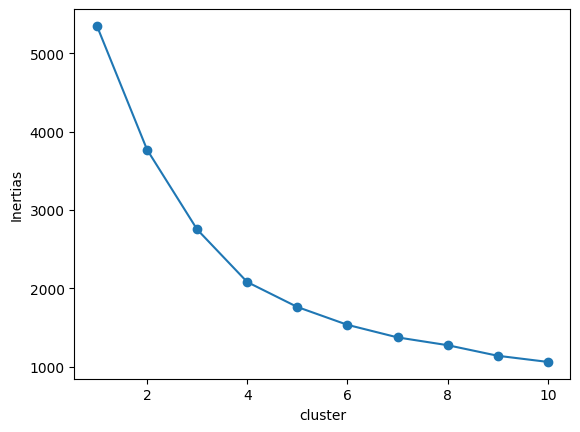

In [40]:
from  sklearn.cluster import KMeans
import matplotlib.pyplot as plt

n_clusters = range(1,11)
lista_inertias = []

for n in n_clusters:
    modelo_kmeans = KMeans(n_clusters=n)
    modelo_kmeans.fit(base_insurance2_padronizado)
    lista_inertias.append(modelo_kmeans.inertia_)

plt.plot(n_clusters, lista_inertias, marker= "o")
plt.xlabel("cluster")
plt.ylabel("Inertias")





## Treinamento do modelo

In [48]:
modelo_kmeans = KMeans(n_clusters=4, random_state=1, n_init=50)
modelo_kmeans.fit(base_insurance2_padronizado)

base_insurance2_padronizado["cluster"] = modelo_kmeans.labels_
display(base_insurance2_padronizado, round(2))
base_insurance2_padronizado.to_csv("base_health_insurance_clusterizado.csv", index=False) 

import joblib

joblib.dump(modelo_kmeans, "kmeans_treinado.pkl")
joblib.dump(scaler, "Sscaler.pkl")

,age,bmi,children,Discount_tratado,cluster
0,-1.438764,-0.651784,-0.908614,1.970587,1
1,-1.509965,-0.746074,-0.078767,-0.507463,2
2,-0.797954,0.746849,1.580926,-0.507463,3
3,-0.441948,-0.777504,-0.908614,-0.507463,2
4,-0.513149,-0.761789,-0.908614,-0.507463,2
...,...,...,...,...,...
1333,0.768473,0.432549,1.580926,-0.507463,3
1334,-1.509965,-0.746074,-0.908614,-0.507463,2
1335,-1.509965,-0.463204,-0.908614,-0.507463,2
1336,-1.296362,-0.683214,-0.908614,-0.507463,2


2

['Sscaler.pkl']